In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd

In [2]:
data_path = "New data base 2023.xlsx"
original = pd.read_excel(data_path, sheet_name='manioc_case_studies_data')

In [3]:
data = original.copy()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 26 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Reference                                         109 non-null    object 
 1   Full Reference                                    109 non-null    object 
 2   Local                                             109 non-null    object 
 3   Country                                           109 non-null    object 
 4   General ethnic group                              109 non-null    object 
 5   Ethnic group                                      109 non-null    object 
 6   People in community                               21 non-null     float64
 7   Number of people in the community                 22 non-null     object 
 8   Date of collection                                109 non-null    object 
 9   Community identificat

In [5]:
#Unnecesary columns
unnecesary_columns = ['Reference', 'Full Reference', 'Has richness per household?',
       'Has number of household that have variety?', 'Obs.']
data = data.drop(columns=unnecesary_columns, errors='ignore')

In [6]:
#Numeric and nunlls
numeric_columns = ['Number of people in the community',
       'Number of informants (percentage of community)', 'Community richness',
       'Household average richness',
       'Standard deviation of household average richness',
       'Minimum household richness', 'Maximun household richness',
       'Simpsom Community', 'Simpsom Household', 'Shannon Community',
       'Shannon Household', 'Berger-Parker Community',
       'Berger-Parker Household']
for column in numeric_columns:
    data.loc[:, column] = pd.to_numeric(data[column], errors = 'coerce')

In [7]:
#Aditional column for one year of collection
data['Year collection'] = data['Date of collection'].apply(lambda x: int(str(x).split('-')[0]))

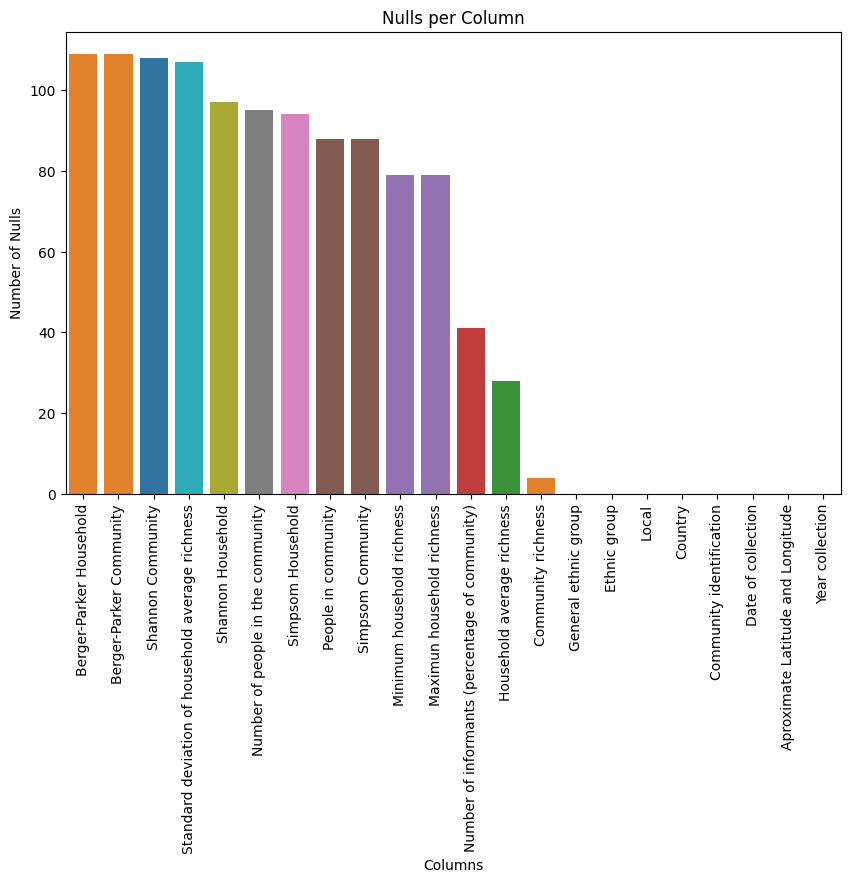

In [8]:
null_counts = data.isnull().sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=null_counts.index, y=null_counts.values, palette="tab10", hue=null_counts.values, dodge=False, legend=False)
plt.xticks(rotation=90)
plt.title('Nulls per Column')
plt.xlabel('Columns')
plt.ylabel('Number of Nulls')
plt.show()

In [9]:
# Eliminate rows with null values in the 'Household average richness' column
#data = data.dropna(subset=['Household average richness'])

In [9]:
data = data.dropna(subset=['Community richness'])

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105 entries, 1 to 108
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Local                                             105 non-null    object 
 1   Country                                           105 non-null    object 
 2   General ethnic group                              105 non-null    object 
 3   Ethnic group                                      105 non-null    object 
 4   People in community                               21 non-null     float64
 5   Number of people in the community                 14 non-null     object 
 6   Date of collection                                105 non-null    object 
 7   Community identification                          105 non-null    object 
 8   Aproximate Latitude and Longitude                 105 non-null    object 
 9   Number of informants (perc

Lo que tengo que hacer es filtrar primero entonces todos los nan de todo lado y luego ahi si aplico el metodo. 
Tambien piensa en que lo que puedes hacer es crear una columna adicional para ver si el lugar importa mucho. Piensa en otras columnas posibles 

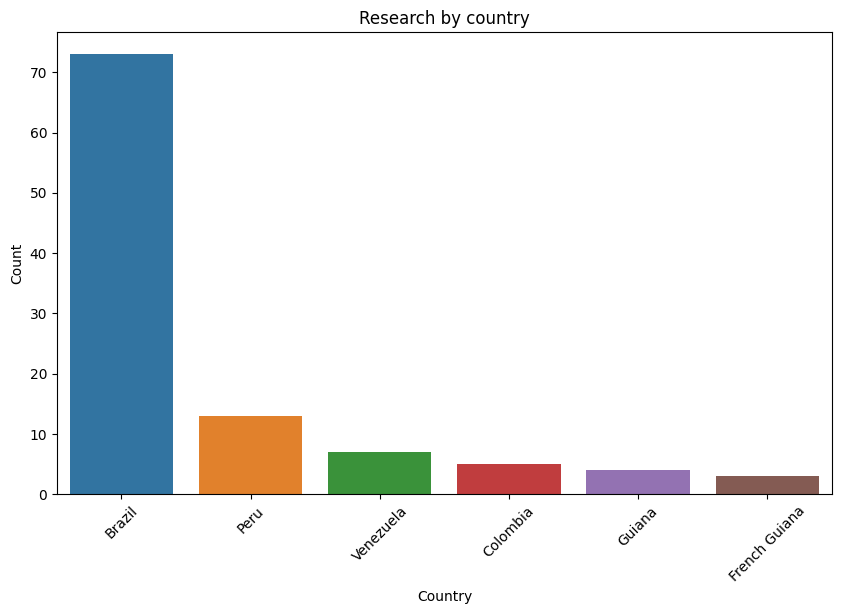

In [11]:
# Count the occurrences of each value in the 'Country' column
value_counts = data['Country'].value_counts()

# Create a bar plot using Seaborn (fixing the warning)
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=value_counts.index, palette="tab10", legend=False)
plt.title('Research by country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [12]:
grouped_stats = data.groupby("General ethnic group")[["Community richness", "Household average richness"]].agg(['mean', 'std'])

print(grouped_stats)

                             Community richness             \
                                           mean        std   
General ethnic group                                         
Indigenous                            28.962264  24.021595   
Mixed                                 41.666667  24.006943   
Other-Traidtional Population          16.163265  13.877961   

                             Household average richness             
                                                   mean        std  
General ethnic group                                                
Indigenous                                    10.272414   6.699555  
Mixed                                         15.333333  15.502688  
Other-Traidtional Population                   3.337826   2.485914  


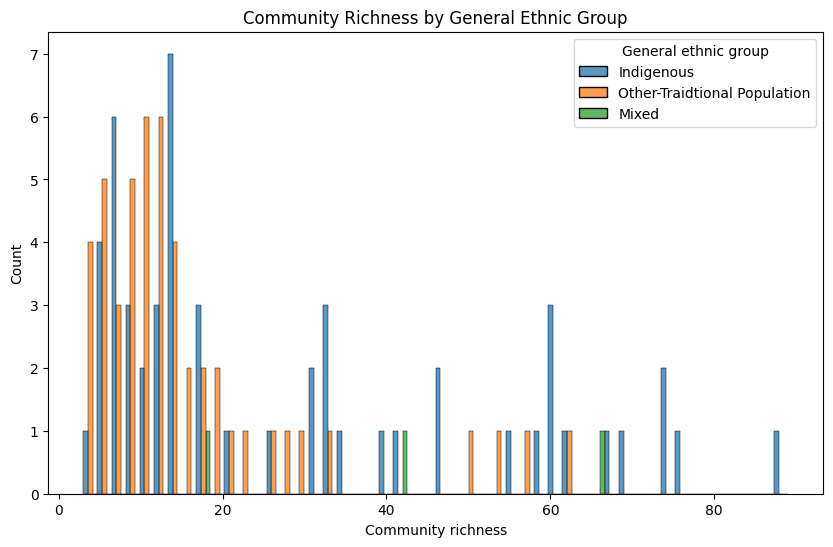

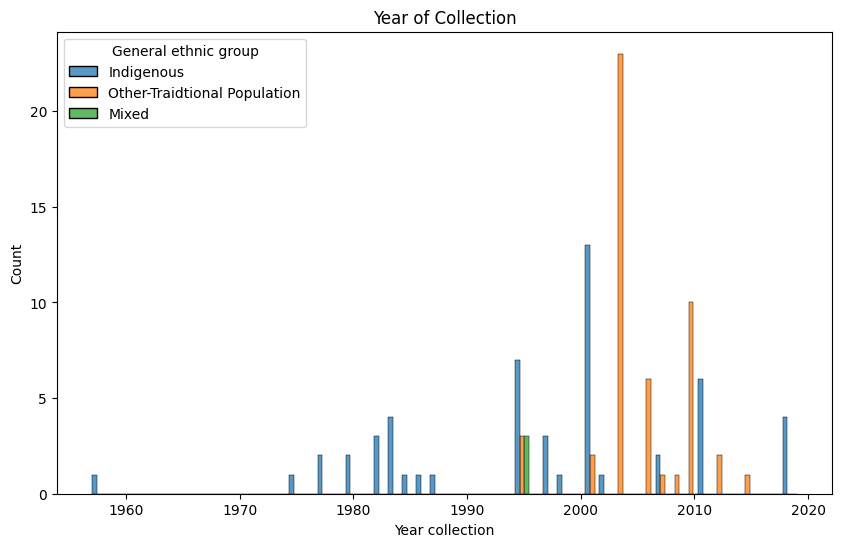

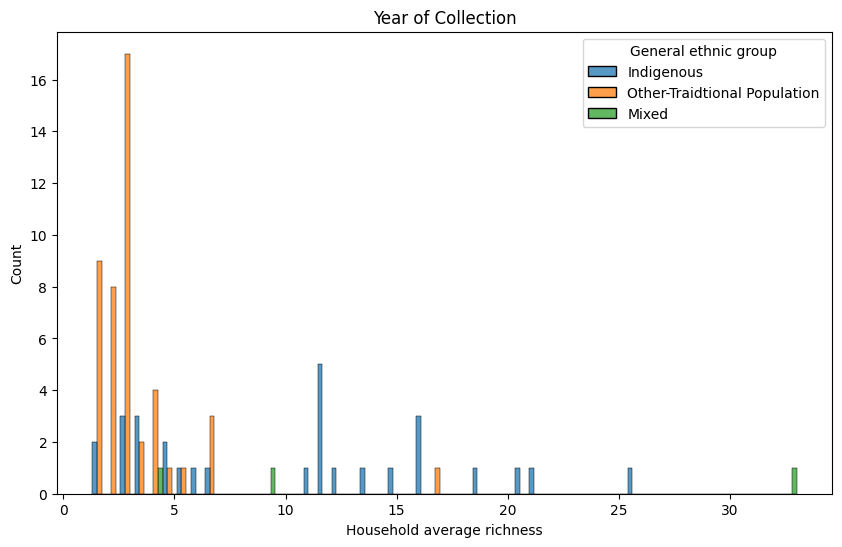

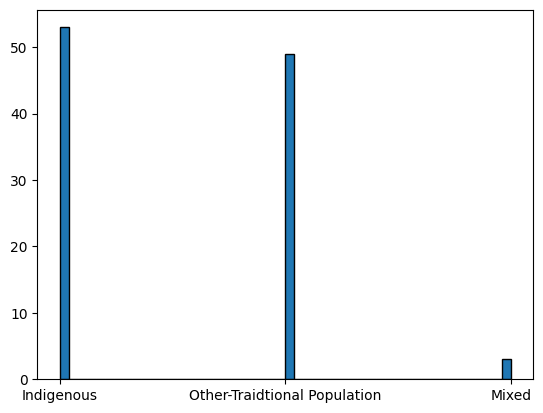

In [13]:
# First histogram: Community richness colored by General ethnic group
bins = 50
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Community richness', hue='General ethnic group', bins=bins, edgecolor='black',palette="tab10",multiple='dodge')
plt.title('Community Richness by General Ethnic Group')
plt.show()

# Second histogram: Year collection colored by General ethnic group
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Year collection', hue='General ethnic group', bins=bins, edgecolor='black', palette="tab10", multiple='dodge')
plt.title('Year of Collection')
plt.show()

# Third histogram: Year collection colored by General ethnic group
plt.figure(figsize=(10,6))
sns.histplot(data=data, x='Household average richness', hue='General ethnic group', bins=bins, edgecolor='black', palette="tab10", multiple='dodge')
plt.title('Year of Collection')
plt.show()

plt.hist(data['General ethnic group'], bins=bins, edgecolor='black')
plt.show()

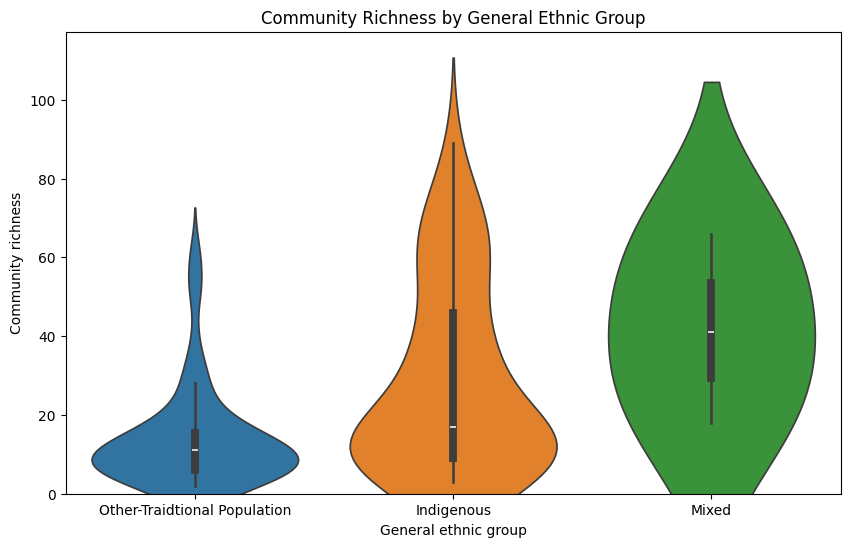

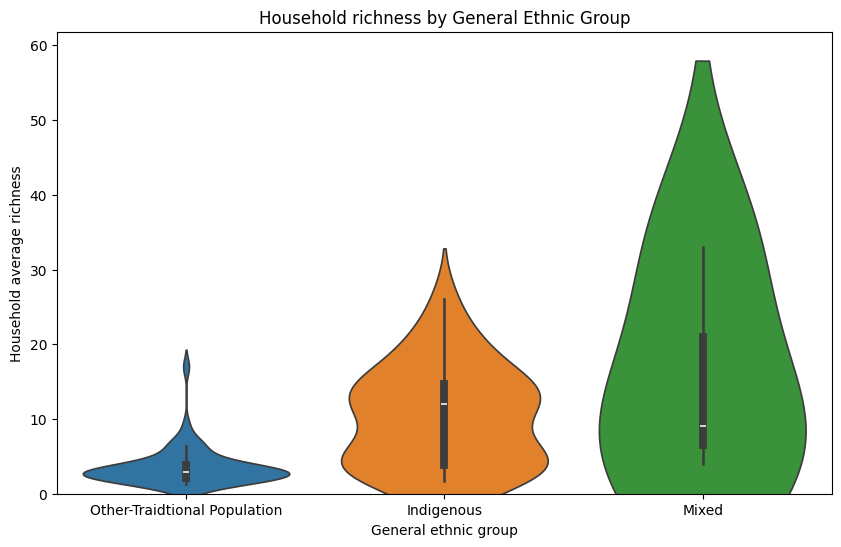

In [15]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='General ethnic group', y='Community richness', hue='General ethnic group', palette="tab10", dodge=False, legend=False)
plt.ylim(0, None)
plt.title('Community Richness by General Ethnic Group')
plt.show()
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='General ethnic group', y='Household average richness', hue='General ethnic group', palette='tab10', dodge=False, legend=False)
plt.ylim(0, None)
plt.title('Household richness by General Ethnic Group')
plt.show()

In [14]:
value_counts = data['General ethnic group'].value_counts()

# Print the results
print(value_counts)

General ethnic group
Indigenous                      53
Other-Traidtional Population    49
Mixed                            3
Name: count, dtype: int64


In [15]:
print(data['Community richness'].mean())
print(data['Community richness'].std())
print(data['Household average richness'].mean())
print(data['Household average richness'].std())

23.35238095238095
20.941760336880133
6.377435897435898
6.366605945248321


In [21]:
print(data['Community richness'].mean())
print(data['Year collection'].mean())
grouped_mean_age = data.groupby('General ethnic group')['Community richness'].mean()
print(grouped_mean_age)
grouped_mean_age = data.groupby('General ethnic group')['Household average richness'].mean()
print(grouped_mean_age)

23.35238095238095
2000.5714285714287
General ethnic group
Indigenous                      28.962264
Mixed                           41.666667
Other-Traidtional Population    16.163265
Name: Community richness, dtype: object
General ethnic group
Indigenous                      10.272414
Mixed                           15.333333
Other-Traidtional Population     3.337826
Name: Household average richness, dtype: object


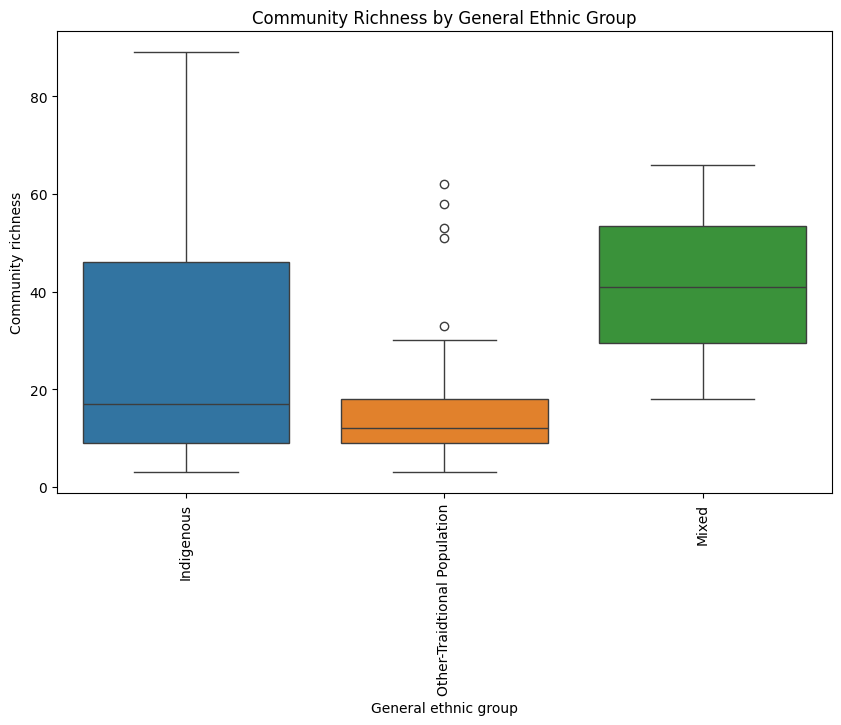

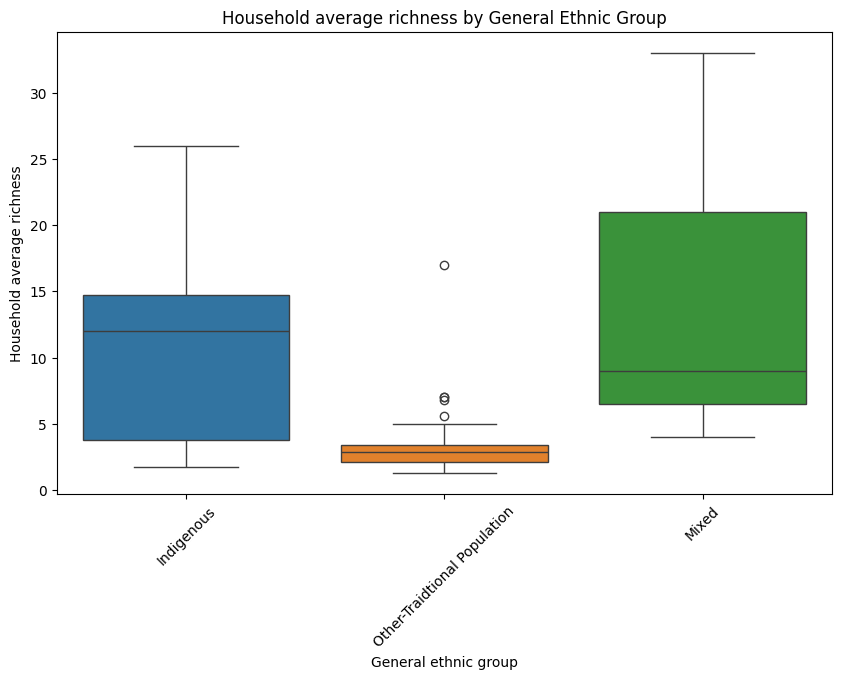

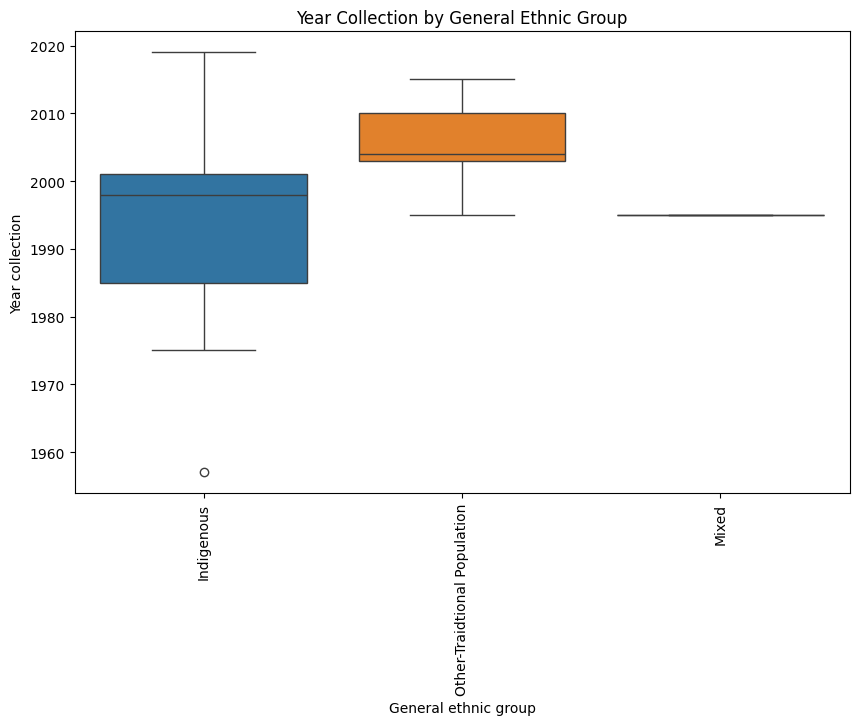

In [17]:
plt.figure(figsize=(10,6))
sns.boxplot(x='General ethnic group', hue='General ethnic group', y='Community richness', data=data, legend=False, palette='tab10')
plt.title('Community Richness by General Ethnic Group')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='General ethnic group', hue='General ethnic group', y='Household average richness', data=data, legend=False, palette='tab10')
plt.title('Household average richness by General Ethnic Group')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(x='General ethnic group', hue='General ethnic group', y='Year collection', data=data, legend=False, palette='tab10')
plt.title('Year Collection by General Ethnic Group')
plt.xticks(rotation=90)
plt.show()

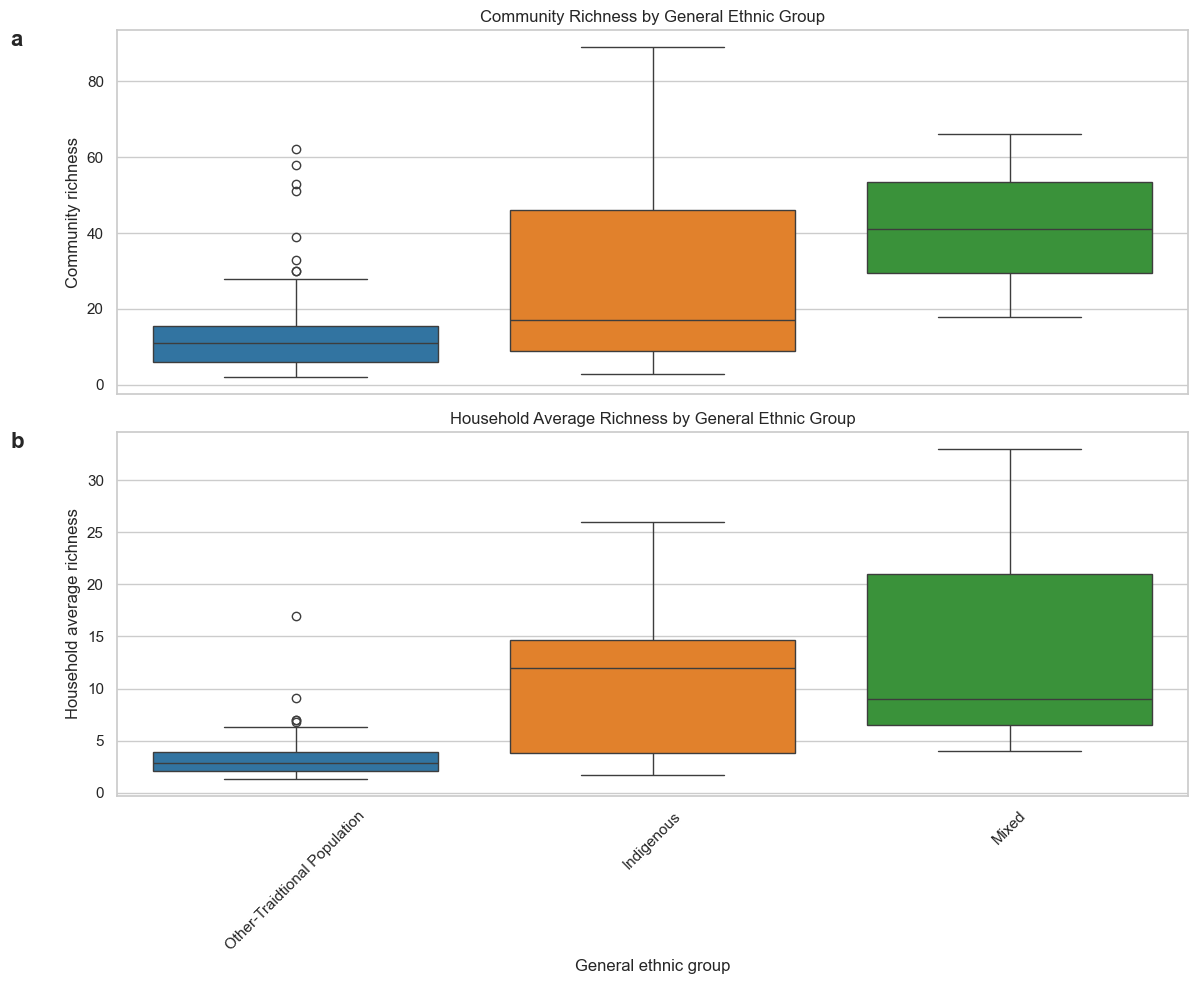

In [23]:
plt.figure(figsize=(12, 10))

# First box plot
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st plot
sns.boxplot(x='General ethnic group', hue='General ethnic group', y='Community richness', data=data, palette='tab10')
plt.title('Community Richness by General Ethnic Group')
plt.xlabel('')  # Remove x-axis label
plt.xticks([])  # Remove x-axis tick labels
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.text(-0.1, 1, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')  # Label "a"

# Second box plot
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd plot
sns.boxplot(x='General ethnic group', hue='General ethnic group', y='Household average richness', data=data, palette='tab10')
plt.title('Household Average Richness by General Ethnic Group')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  # Remove duplicate legend
plt.text(-0.1, 1, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')  # Label "b"

plt.tight_layout()
plt.show()

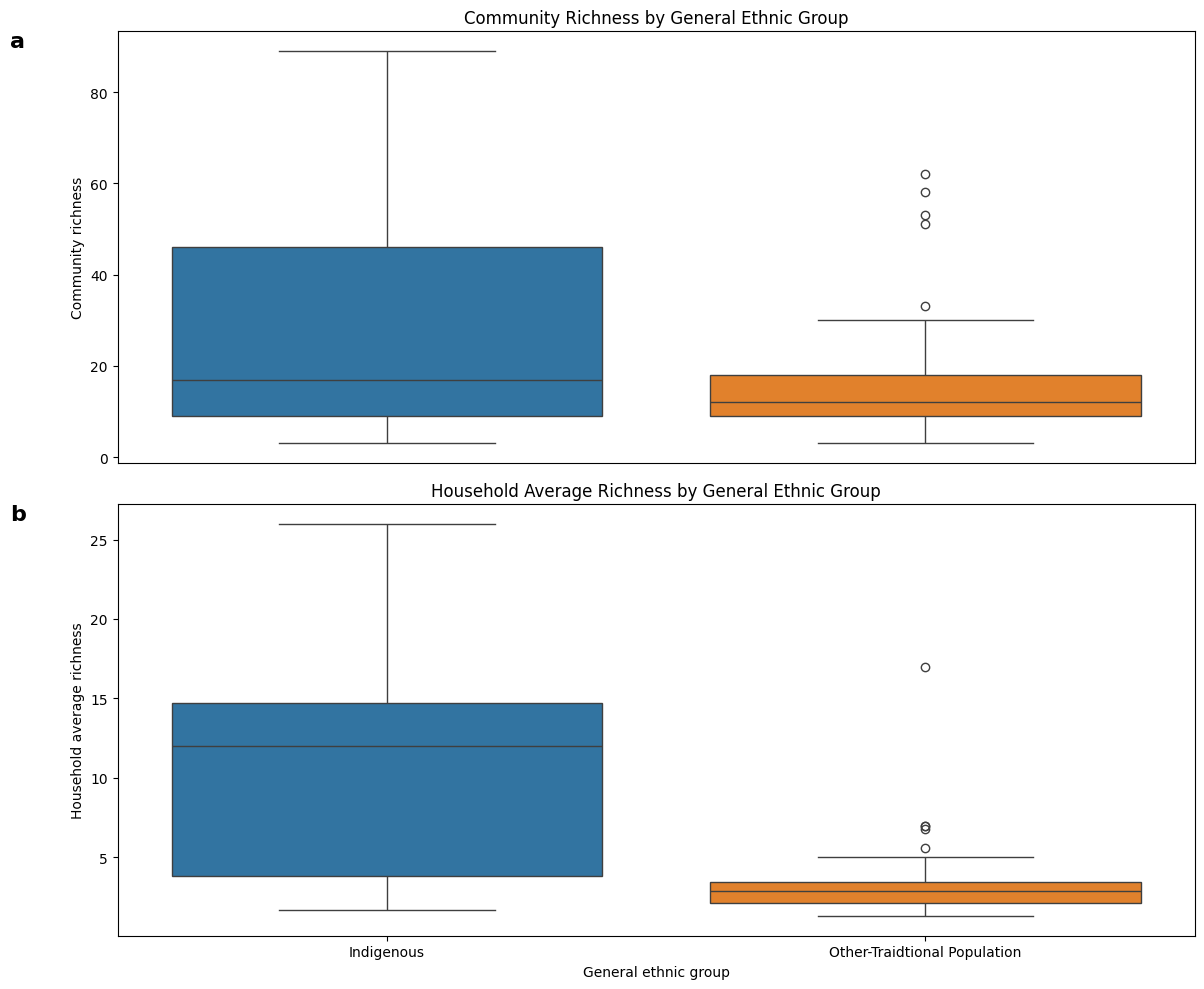

In [18]:
# Filter data to include only the first two categories
first_two_categories = data['General ethnic group'].unique()[:2]
filtered_data = data[data['General ethnic group'].isin(first_two_categories)]

plt.figure(figsize=(12, 10))

# First box plot
plt.subplot(2, 1, 1)
sns.boxplot(x='General ethnic group', hue='General ethnic group', y='Community richness', data=filtered_data, palette='tab10')
plt.title('Community Richness by General Ethnic Group')
plt.xlabel('')
plt.xticks([])
plt.legend([], [], frameon=False)
plt.text(-0.1, 1, 'a', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

# Second box plot
plt.subplot(2, 1, 2)
sns.boxplot(x='General ethnic group', hue='General ethnic group', y='Household average richness', data=filtered_data, palette='tab10')
plt.title('Household Average Richness by General Ethnic Group')
plt.xticks(rotation=0)
plt.legend([], [], frameon=False)
plt.text(-0.1, 1, 'b', transform=plt.gca().transAxes, fontsize=16, fontweight='bold', va='top')

plt.tight_layout()
plt.show()

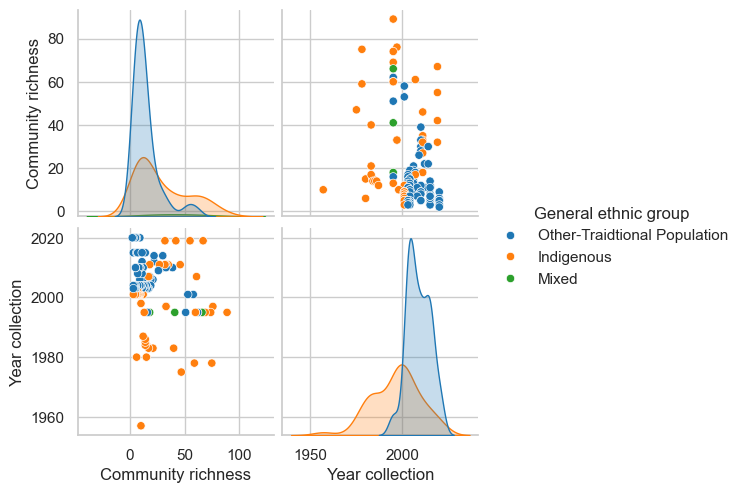

In [27]:
sns.pairplot(data, hue='General ethnic group', vars=['Community richness', 'Year collection'],     palette="tab10")
plt.show()

UFuncTypeError: Cannot cast ufunc 'svd_n_s' input from dtype('O') to dtype('float64') with casting rule 'same_kind'

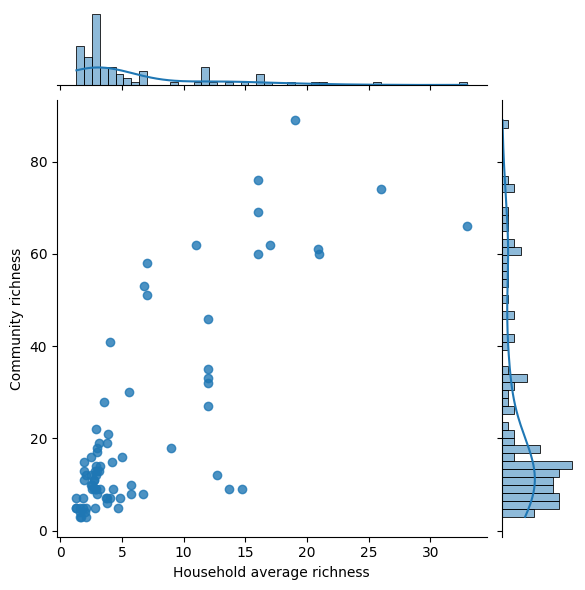

In [19]:
# Create a jointplot with histograms on the sides
sns.jointplot(data=data, x='Household average richness', y='Community richness', kind='reg', marginal_kws=dict(bins=50, fill=True))

# Add title
plt.suptitle('Correlation between Community Richness and Year Collection', y=1.03)

# Show the plot
plt.show()

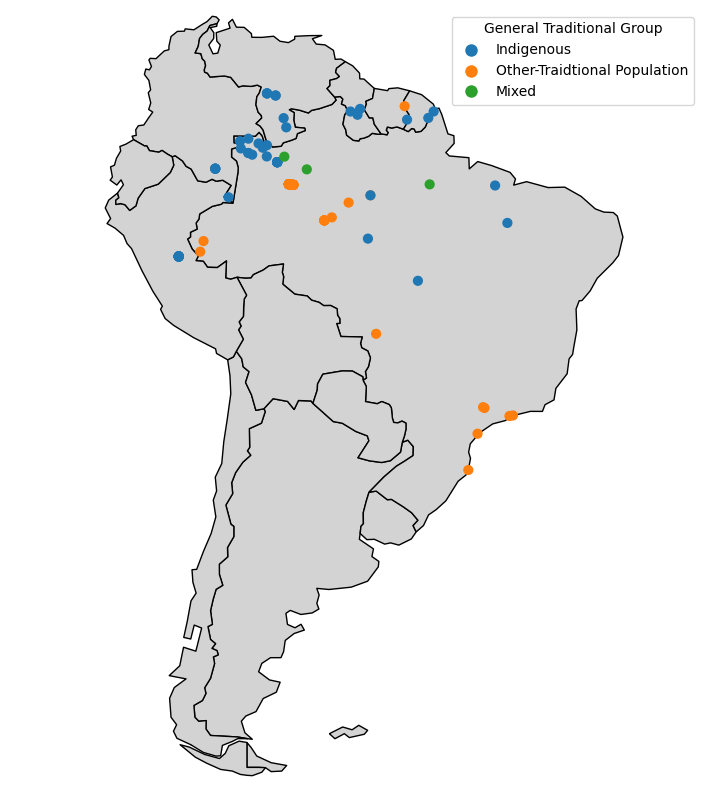

In [20]:
# Split the Latitude and Longitude from the original column
data[['Latitude', 'Longitude']] = data['Aproximate Latitude and Longitude'].str.split(',', expand=True)
data['Latitude'] = pd.to_numeric(data['Latitude'])
data['Longitude'] = pd.to_numeric(data['Longitude'])

# Create a GeoDataFrame
gdf = gpd.GeoDataFrame(
    data, 
    geometry=gpd.points_from_xy(data['Longitude'], data['Latitude']),
    crs="EPSG:4326" 
)

# Load South America shapefile
world = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')
south_america = world[world['CONTINENT'] == 'South America']

# Create a figure and axis for the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plot South America
south_america.plot(ax=ax, color='lightgray', edgecolor='black')

# Highlight France (including French Guiana)
world[world['NAME'] == 'France'].plot(ax=ax, color='lightgray', edgecolor='black', linewidth=1)  # Adjust color as needed

# Get unique categories and their corresponding colors
unique_groups = gdf['General ethnic group'].unique()
tab10_colors = sns.color_palette("tab10", n_colors=len(unique_groups))

# Create a dictionary to map each group to a specific color
group_colors = {group: tab10_colors[i] for i, group in enumerate(unique_groups)}

# Create a new column for colors based on the General ethnic group
gdf['color'] = gdf['General ethnic group'].map(group_colors)

# Plot the GeoDataFrame using the mapped colors
gdf.plot(ax=ax, color=gdf['color'], markersize=40)

# Add custom legend with adjusted position
handles = [plt.Line2D([0], [0], marker='o', color='w', label=group, 
                       markerfacecolor=group_colors[group], markersize=10) 
           for group in unique_groups]

# Adjust legend position by using bbox_to_anchor
ax.legend(title='General Traditional Group', handles=handles, loc='upper left', bbox_to_anchor=(0.7, 1))

# Set axis limits and title
ax.axis('off')
ax.set_xlim([-90, -34])
ax.set_ylim([-56, 13]) 
#plt.title('Manioc Data')

# Show the plot
plt.show()
